In [2]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [7]:
microsoft = pd.read_csv(r"C:\Users\Niks-business\Downloads\MicrosoftStock.csv", usecols=lambda col: col != 'index')
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [9]:
microsoft.shape

(1259, 7)

In [10]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [11]:
microsoft['date'] = pd.to_datetime(microsoft['date'])

In [12]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [13]:
microsoft.describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,51.026394,51.436007,50.630397,51.063081,3.386946e+07
min,2013-02-08 00:00:00,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,2014-05-10 12:00:00,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,2015-08-10 00:00:00,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,2016-11-05 12:00:00,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,2018-02-07 00:00:00,95.140000,96.070000,93.720000,95.010000,2.483542e+08
std,NaN,14.859387,14.930144,14.774630,14.852117,1.958979e+07


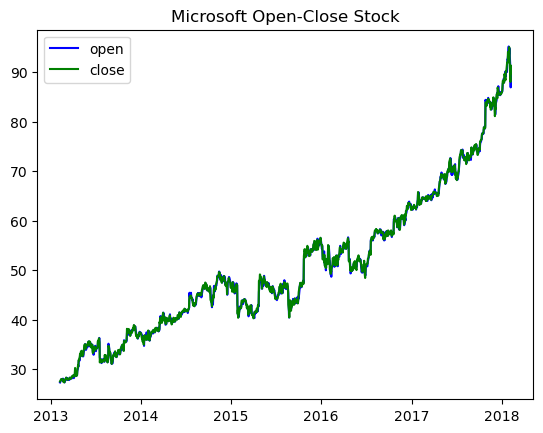

In [14]:
plt.plot(microsoft['date'], 
		microsoft['open'], 
		color="blue", 
		label="open") 
plt.plot(microsoft['date'], 
		microsoft['close'], 
		color="green", 
		label="close") 
plt.title("Microsoft Open-Close Stock") 
plt.legend() 

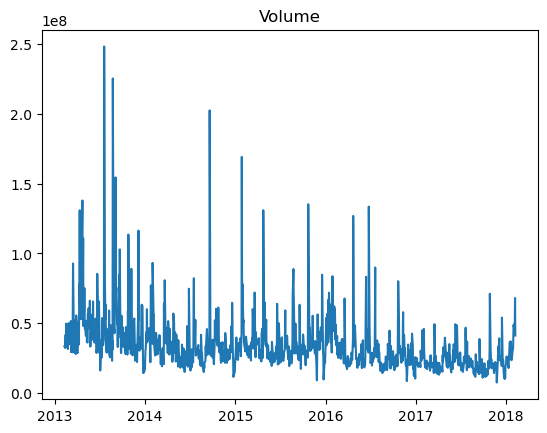

In [16]:
plt.plot(microsoft['date'],
        microsoft['volume'])
plt.title('Volume')
plt.show()

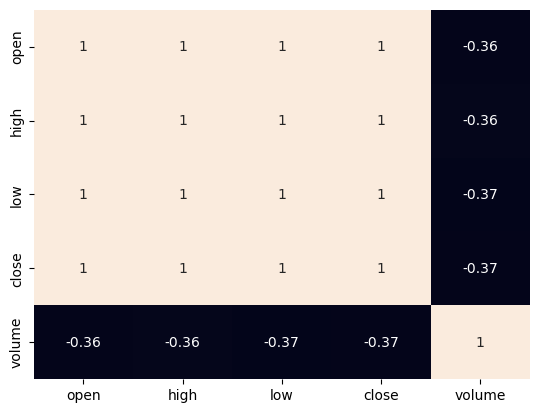

In [ ]:
sns.heatmap(microsoft.select_dtypes(include=np.number).corr(), 
			annot=True, 
			cbar=False) 
plt.show() 


Text(0.5, 1.0, 'Microsoft Stock Prices')

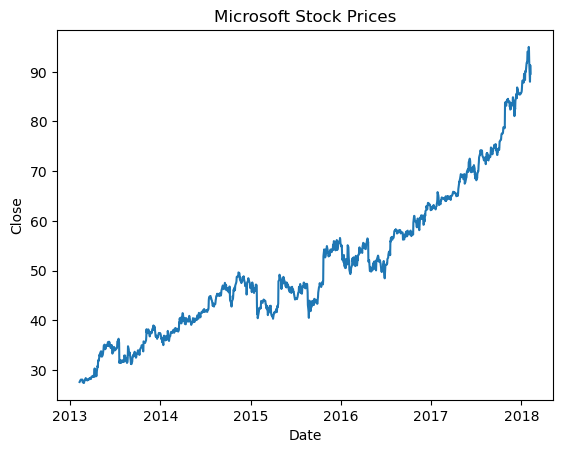

In [19]:
prediction = microsoft.loc[(microsoft['date']> datetime(2013, 1, 1))& (microsoft['date']< datetime(2018, 1, 1))]
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [20]:
# prepare the training set samples 
msft_close = microsoft.filter(['close']) 
dataset = msft_close.values 
training = int(np.ceil(len(dataset) * .95)) 

In [21]:
# scale the data 
ss = StandardScaler() 
ss = ss.fit_transform(dataset) 

In [22]:
train_data = ss[0:int(training), :] 

x_train = [] 
y_train = []

In [ ]:

sequence_length = 60

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.metrics import RootMeanSquaredError 
model.compile(optimizer='adam', 
            loss='mae', 
            metrics=[RootMeanSquaredError()]) 

history = model.fit(X_train, y_train, 
					epochs=20)

Epoch 1/20
36/36 [==============================] - 4s 34ms/step - loss: 0.1873 - root_mean_squared_error: 0.2788
Epoch 2/20
36/36 [==============================] - 1s 36ms/step - loss: 0.1053 - root_mean_squared_error: 0.1438
Epoch 3/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0938 - root_mean_squared_error: 0.1260
Epoch 4/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0915 - root_mean_squared_error: 0.1257
Epoch 5/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0892 - root_mean_squared_error: 0.1202
Epoch 6/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0886 - root_mean_squared_error: 0.1196
Epoch 7/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0845 - root_mean_squared_error: 0.1142
Epoch 8/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0835 - root_mean_squared_error: 0.1130
Epoch 9/20
36/36 [==============================] - 1s 34ms/step - loss: 0.0794 - root_m

In [27]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 [==============================] - 1s 14ms/step


C:\Users\Niks-business\AppData\Local\Temp\ipykernel_8388\3272607065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


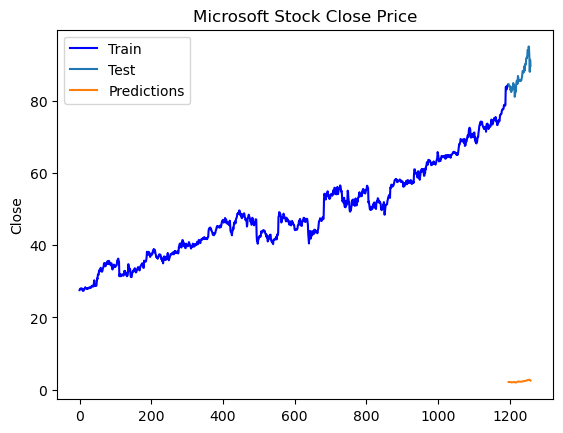

In [29]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])